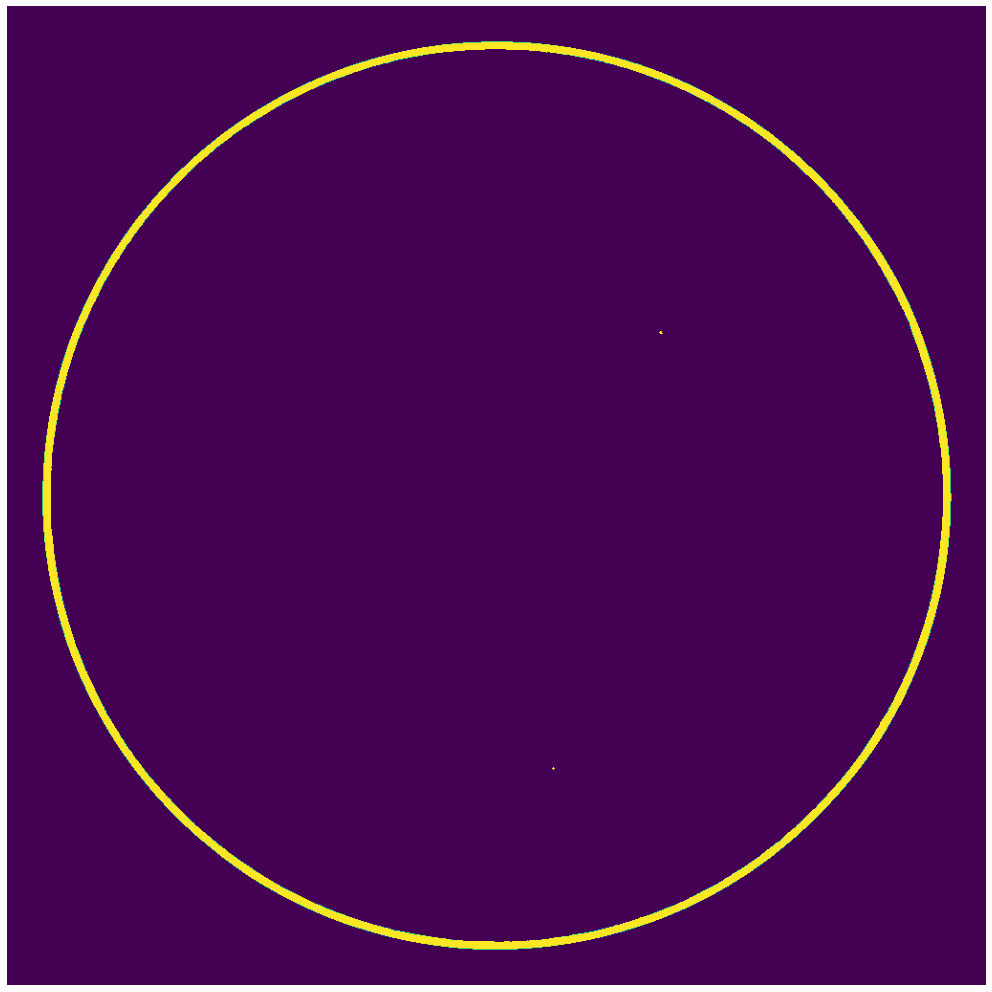

<Figure size 1296x1296 with 0 Axes>

In [4]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import pandas as pd

def realtime_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image , dsize=(1024, 1024), interpolation=cv2.INTER_AREA)
    return image

def noise_cancelling(img, a, b, c, d):
    cancelled_img = cv2.fastNlMeansDenoisingColored(img, None, a, b, c, d)
    return cancelled_img

def convert2binary(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 131, 15)
    return binary_img 

def main():
    url = "https://sdo.gsfc.nasa.gov/assets/img/latest/latest_1024_HMII.jpg"
    image = realtime_image(url)
    image = noise_cancelling(image, 5, 5, 5, 21)
    image = convert2binary(image)
    
    # 15 * 15 Image
    plt.rcParams["figure.figsize"] = (18, 18)
    imgplot = plt.imshow(image)
    
    # Axis off
    plt.axis("off")
    plt.show()
    
    # Image Save
    plt.tight_layout()
    plt.savefig('SUN.png')
    
if __name__ == "__main__":
    main()